In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
dfTrain = pd.DataFrame(pd.read_csv('./titanic/train.csv'))
dfTest =  pd.DataFrame(pd.read_csv('./titanic/test.csv'))
print(dfTrain.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


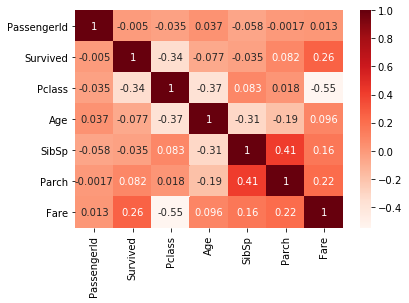

In [80]:
sns.heatmap(dfTrain.corr(),annot=True,cmap='Reds')

In [81]:
variaveis_importantes = list(['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked'])


In [82]:
#Print(dfTrain.shape)
#print(dfTest.shape)

#dfTrain.isnull().sum()
#dfTest.isnull().sum()
dfTrain.dropna(subset=['Age','Fare'],inplace=True)
#print(dfTrain.shape)
dfTest.dropna(subset=['Age','Fare'],inplace=True)
#print(dfTest.shape)


In [83]:
X_Train = dfTrain.loc[:,variaveis_importantes] 
Y_train = dfTrain.iloc[:,1]

X_Test = dfTest.loc[:,variaveis_importantes] 
Y_test = dfTest.iloc[:,1]


In [84]:
dummies = ['Sex','Embarked']

X_Train_drop = pd.get_dummies(X_Train.loc[:,dummies])
X_Train = X_Train.drop(dummies,axis =1)


X_Test_drop = pd.get_dummies(X_Test.loc[:,dummies])
X_Test = X_Test.drop(dummies,axis =1)


In [85]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_Train)
X_Train_new = imputer.transform(X_Train)
X_Train = pd.DataFrame(X_Train_new,columns=X_Train.columns)
X_Train = np.concatenate((X_Train,X_Train_drop),axis = 1)

imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_Test)
X_Test_new = imputer.transform(X_Test)
X_Test = pd.DataFrame(X_Test_new,columns=X_Test.columns)
X_Test.isnull().sum()
X_Test = np.concatenate((X_Test,X_Test_drop),axis =1)

print(X_Train.shape)

(714, 10)


In [86]:
from sklearn.model_selection import train_test_split
X_Train, X_val, Y_train, Y_val = train_test_split(X_Train,Y_train,test_size = 0.2,random_state= 0)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2)
X_Train = poly.fit_transform(X_Train)
X_Test = poly.fit_transform(X_Test)
X_val = poly.fit_transform(X_val)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
svm = LogisticRegression(C=3).fit(X_Train,Y_train)
#clf = SVC(C=3,kernel='linear').fit(X_Train,Y_train)
gb = GradientBoostingClassifier().fit(X_Train,Y_train)
ln = LinearRegression().fit(X_Train,Y_train)

In [89]:

y_pred = np.array(svm.predict_proba(X_Train))[:,0]
aux = y_pred>=0.5
y_pred[aux] = 1
aux = y_pred!=1
y_pred[aux] = 0
print(accuracy_score(y_pred,Y_train)*100)


21.541155866900176


In [90]:
'''
y_pred = clf.predict(X_val)
print(accuracy_score(y_pred,Y_val)*100)
'''

'\ny_pred = clf.predict(X_val)\nprint(accuracy_score(y_pred,Y_val)*100)\n'

In [91]:

y_pred = gb.predict(X_val)
print(accuracy_score(y_pred,Y_val)*100)


83.91608391608392


In [92]:
y_pred = ln.predict(X_val)
print(y_pred)
aux = y_pred>=0
y_pred[aux] = 1
aux = y_pred!=1
y_pred[aux] = 0
print(accuracy_score(y_pred,Y_val)*100)

[ 0.44079889  1.05793717  0.76506192  0.18558657  0.44375116  0.08638127
  0.24675447  0.10990836  0.19640611  0.19452853  0.16453821  0.49281682
  0.79509148  0.12816095  0.23044719  0.83666727  0.12753006  0.59300889
  0.59161184  0.09443127  0.18013489  0.74552949  0.81487931  0.03011003
  0.10783479  0.59300889  0.89924192  0.25727751  0.3949265   0.46597513
  0.0970991   0.04785889  0.18511352  1.19832397  0.08378703  0.06328091
  1.12390612  0.2576522   0.18196979  0.48054856  0.1680619   0.17289898
  0.34182827  0.43816513  0.11972002  0.55869429  0.20757321  0.2259964
  0.08078123  0.05752178  0.27376227  0.73585103  0.19188905  0.97108456
  0.84609069  0.3894189   0.90712966  0.05033735  0.07009091  0.34217911
  0.20718225  0.05741951  0.78684823  0.18574663  0.94111689  0.43464093
  0.93345438  0.11311491  1.09623458  0.5342681   0.16298067  0.35094275
  0.96584792  1.09705179  1.08811486  0.36310665  0.50222248  0.1919145
  0.11369031  0.2111729   0.8024864   0.40999885  0.2

In [93]:
predictions = gb.predict(X_Test)
ids = dfTest['PassengerId']
submission = pd.DataFrame({'PassengerId':ids,'Survived':predictions.astype('int64')})
submission.to_csv('submission.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'submission.csv'